## Midpoint Circle Algorithm


Uma das formas de desenharmos um círculo seria calcularmos a curva da circunferência no primeiro quadrante e projetarmos simetricamente nos demais quadrantes. Uma das técnicas para tal é o **Midpoint Circle Algorithm**, muito famoso na Computação Gráfica e utilizado a gerações de computadores para evitar o uso de trigonometria na rasterização de círculos.

O algoritmo consiste em utilizar a equação do círculo para decidir se deve mover ou não no eixo y para desenhar um novo ponto. O desenho é feito de maneira dividida em 8 octantes, onde no primeiro são feitos todos os cálculos e para os demais é feita a projeção simétrica a partir do primeiro.

Analisando uma circunferência, é possível perceber:

a) Um raio r

b) Um primeiro ponto a 90˚:

$$(x_0, y_0) = (0, r)$$

c) Sucessivos pontos desenhados a partir do primeiro, em sentido horário enquanto x < y, definindo assim o primeiro octante

d) A projeção simétrica dos pontos do primeiro octante de forma a encontrar os demais. Cada octante representa uma fatia de 45˚ da circunferência:

- (x, y)
- (y, x)
- (-y, x)
- (-x, y)
- (-x, -y)
- (-y, -x)
- (y, -x)
- (x, -y)

e) Pela equação do círculo:

$$x^2 + y^2 = r^2 \therefore x^2 + y^2 - r^2 = 0$$

Percebemos que dada uma coordenada (x, y) e um raio r, o resultado p(x, y) será:

$$p(x, y) = x^2 + y^2 - r^2$$

- p = 0 se a coordenada interceptar a circunferência do círculo
- p < 0 se a coordenada estiver dentro da área do círculo
- p > 0 se a coordenada estiver fora da área do círculo

Para aplicarmos o algoritmo, consideramos como o ponto da equação da circuferência a média entre dois prováveis candidatos a uma próxima coordenada válida da circunferência, partindo da primeira:

$$(x_{k + 1}, y_{k - 1})$$

ou

$$(x_{k + 1}, y_k)$$

Para entender a escolha das duas coordenadas, basta observar que no primeiro octante, que vai de 90˚ a 45˚, o valor de x sempre cresce e o de y ocasionalmente decresce. Tal média de coordenadas nos dá uma heurística interessante para aplicarmos a rasterização dos pixels.

Sendo assim, a média dos dois pontos será:

$$x_m = \frac{x_k + 1 + x_k + 1}{2}$$

$$y_m = \frac{y_k - 1 + y_k}{2}$$

$$\therefore (x_m, y_m) = (x_k + 1, y_k - \frac{1}{2})$$

Aplicando o ponto médio (que dá nome ao algoritmo) à equação do círculo, temos a métrica p necessária para decidirmos como vamos desenhar cada coordenada válida da circunferência no primeiro octante:

$$p_k = (x_k + 1)^2 + (y_k - \frac{1}{2})^2 - r^2$$

$$p_{k + 1} = (x_{k + 1} + 1)^2 + (y_k - \frac{1}{2})^2 - r^2$$

Ainda precisamos da diferença de p entre duas coordenadas adjacentes, assim teremos como métrica a variação do ponto médio das duas próximas coordenadas em potencial, nos ajudando desta forma a decidir qual deve ser a escolhida:

$$p' = p_{k + 1} - p_k = 2(x_k + 1) + (y^2_{k + 1} - y^2_k) - (y_{k + 1} - y_k) + 1$$

Assim, o próximo valor de p é:

$$p_{k + 1} = p_k + p'$$

Através de p, escolheremos o próximo ponto a ser desenhado:

- Se p ≥ 0 então a coordenada extrapola ou intercepta a circunferência e precisamos decrementar y, logo a coordenada escolhida será $$(x_{k + 1}, y_k - 1)$$
- Se p < 0 então a coordenada intersecciona a área do círculo e não precisamos decrementar y, logo a coordenada escolhida será $$(x_{k + 1}, y_k)$$

O último desafio é escolher o primeiro valor de p. Aplicando a coordenada (0, r) à equação do círculo com os pontos médios. Para fins de rasterização, ignoramos o resto da divisão e, portanto, arredondamos o resultado:

$$p_0 = \lfloor(0 + 1)^2 + (r - \frac{1}{2})^2 - r^2 \rceil = \lfloor \frac{5}{4} - r \rceil = 1 - r$$



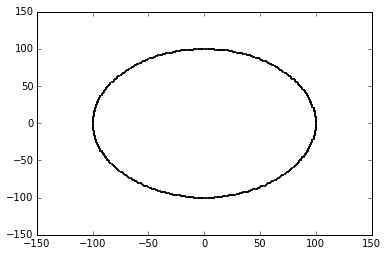

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

r = 100

p = 1 - r
x = 0
y = r

while x < y:
    x += 1
    
    _y = y
    y = y - 1 if p >= 0 else y

    p = p + 2 * (x + 1) + (y**2 - _y**2) - (y - _y) + 1
    
    plt.scatter(x, y, s=1)
    plt.scatter(y, x, s=1)
    plt.scatter(-y, x, s=1)
    plt.scatter(-x, y, s=1)
    plt.scatter(-x, -y, s=1)
    plt.scatter(-y, -x, s=1)
    plt.scatter(y, -x, s=1)
    plt.scatter(x, -y, s=1)

    
plt.show()